In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from tensorflow.keras import layers
from sklearn.model_selection import KFold
%matplotlib inline
import matplotlib.pyplot as plt
from keras import metrics
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
import time
import statistics #for mean computation of metrics


In [2]:
from sklearn.preprocessing import MinMaxScaler

### Import data 

In [3]:
rf_data = pd.read_csv(r"D:\Thesis\Modelling and Deployment\RandomForest(rawData).csv")

In [5]:
sff_data = pd.read_csv(r"D:\Thesis\Modelling and Deployment\SFF2 (rawData).csv")

In [6]:
vif_data = pd.read_csv(r"D:\Thesis\Modelling and Deployment\VIF(rawData).csv")

### Define features and target

In [4]:
rf_data_X = rf_data.iloc[:,1:5]
rf_data_y = rf_data.iloc[:,-1]

In [8]:
sff_data_X =sff_data.iloc[:,1:5]
sff_data_y = sff_data.iloc[:,-1]

In [9]:
vif_data_X =vif_data.iloc[:,1:5]
vif_data_y = vif_data.iloc[:,-1]

### MLR ANN Model

In [5]:
from sklearn.linear_model import LinearRegression
def MLR_Model(X_train,y_train):
    mlr = LinearRegression()
    mlr.fit(X_train,y_train)
    return mlr

In [11]:
def ANN_Model (initial_weights,bias,neurons = 1,learning_rate=0.01, input_shape=16, activation='relu'): 
    model = Sequential()
    model.add(Input(shape = X_train.shape[1])) # number of input features 
    model.add(Dense(neurons, activation = activation, name = 'hidden')) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = 'linear',name='output')) # one neuron in output layer, linear activation


    #initialize weights and bias in hidden layer
    hidden_layer = model.get_layer('hidden')
    #layer.set_weights([weights_array, bias_array])
    hidden_layer.set_weights([np.array([initial_weights]).reshape((4, 1)), np.array([bias])])


    #compile 
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model

## Cross Validation

### Hybrid Model

### RF Data

In [15]:
r2_all=[]
mae_all=[]
rmse_all = []
exec_time =[]

In [16]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability
r2=[]
mae=[]
rmse = []

for train_index, test_index in kfold.split(rf_data_X):
    X_train, X_test = rf_data_X.iloc[train_index], rf_data_X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = rf_data_y.iloc[train_index], rf_data_y.iloc[test_index]  # Target for train, test

    # scaling feature sets 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    
    mlr_model = MLR_Model(X_train,y_train) #perform MLR
    rf_ann_model = ANN_Model(mlr_model.coef_,mlr_model.intercept_) #Intercept and coeff of MLR will be initailzied as ANN weights
    rf_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = rf_ann_model.predict(X_test) #use ann model to predict test set
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

end_time = time.time()
execution_time = end_time - start_time
exec_time.append(round(execution_time,2))
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


3/3 [==============================] - 0s 3ms/step
 R-squared: 0.06, MAE: 0.37, RMSE: 0.50
Execution time: 314.2509603500366 seconds


### SFF Data

In [10]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability
r2=[]
mae=[]
rmse = []

for train_index, test_index in kfold.split(sff_data_X):
    X_train, X_test = sff_data_X.iloc[train_index], sff_data_X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = sff_data_y.iloc[train_index], sff_data_y.iloc[test_index]  # Target for train, test

    # scaling feature sets 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    
    mlr_model = MLR_Model(X_train,y_train) #perform MLR
    sff_ann_model = ANN_Model(mlr_model.coef_,mlr_model.intercept_) #Intercept and coeff of MLR will be initailzied as ANN weights
    sff_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = sff_ann_model.predict(X_test) #use ann model to predict test set
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

end_time = time.time()
execution_time = end_time - start_time
exec_time.append(round(execution_time,2))
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


3/3 [==============================] - 0s 0s/step
 R-squared: 0.07, MAE: 0.35, RMSE: 0.47
Execution time: 240.86697959899902 seconds


### VIF Data

In [183]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability
r2=[]
mae=[]
rmse = []

for train_index, test_index in kfold.split(vif_data_X):
    X_train, X_test = vif_data_X.iloc[train_index], vif_data_X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = vif_data_y.iloc[train_index], vif_data_y.iloc[test_index]  # Target for train, test

    # scaling feature sets 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    mlr_model = MLR_Model(X_train,y_train) #perform MLR
    vif_ann_model = ANN_Model(mlr_model.coef_,mlr_model.intercept_) #Intercept and coeff of MLR will be initailzied as ANN weights
    vif_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = vif_ann_model.predict(X_test) #use ann model to predict test set
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

end_time = time.time()
execution_time = end_time - start_time
exec_time.append(round(execution_time,2))
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


3/3 [==============================] - 0s 0s/step
 R-squared: 0.06, MAE: 0.36, RMSE: 0.49
Execution time: 231.25638580322266 seconds


## Traditional ANN

### Traditional ANN Model

In [18]:
def Trad_ANN_Model (units = 1,learning_rate = 0.01,activation = 'relu'): 
    model = Sequential()
    model.add(Input(shape = (X_train.shape[1],))) # number of input features 
    model.add(Dense(units=units, activation = activation)) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = 'linear')) # one neuron in output layer, linear activation

    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model

### RF Data

In [23]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability
r2 =[]
mae =[]
rmse = []


for train_index, test_index in kfold.split(rf_data_X):
    X_train, X_test = rf_data_X.iloc[train_index], rf_data_X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = rf_data_y.iloc[train_index], rf_data_y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    rf_trad_ann_model = Trad_ANN_Model()
    rf_trad_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = rf_trad_ann_model.predict(X_test) #use ann model to predict test set
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    

end_time = time.time()
execution_time = end_time - start_time
exec_time.append(round(execution_time,2))
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


3/3 [==============================] - 0s 10ms/step
 R-squared: 0.04, MAE: 0.37, RMSE: 0.50
Execution time: 239.07743978500366 seconds


### SFF Data

In [19]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability
r2 =[]
mae =[]
rmse = []

for train_index, test_index in kfold.split(sff_data_X):
    X_train, X_test = sff_data_X.iloc[train_index], sff_data_X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = sff_data_y.iloc[train_index], sff_data_y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    sff_trad_ann_model = Trad_ANN_Model()
    sff_trad_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = sff_trad_ann_model.predict(X_test) #use ann model to predict test set
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

end_time = time.time()
execution_time = end_time - start_time
exec_time.append(round(execution_time,2))
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


3/3 [==============================] - 0s 3ms/step
 R-squared: 0.09, MAE: 0.35, RMSE: 0.47
Execution time: 236.16213250160217 seconds


### VIF Data

In [30]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=2,shuffle=True, random_state=42) #random_state is for reproducability
r2 =[]
mae =[]
rmse = []

for train_index, test_index in kfold.split(vif_data_X):
    X_train, X_test = vif_data_X.iloc[train_index], vif_data_X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = vif_data_y.iloc[train_index], vif_data_y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    vif_trad_ann_model = Trad_ANN_Model()
    vif_trad_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = vif_trad_ann_model.predict(X_test) #use ann model to predict test set
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

end_time = time.time()
execution_time = end_time - start_time
exec_time.append(round(execution_time,2))
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


12/12 [==============================] - 0s 1ms/step
 R-squared: -0.02, MAE: 0.38, RMSE: 0.52
Execution time: 31.697007417678833 seconds


## Visualization

In [46]:
r2_all = ['0.11','0.07','0.06','0.07','0.09','0.07']
mae_all = ['0.36','0.35','0.36','0.37','0.35','0.37']
rmse_all=['0.48','0.47','0.49','0.49','0.47','0.49'] 
exec_time = ['230.42','240.87','231.26','239.20','236.16','269.26']

In [47]:
fs_methods=['RF','SFF','VIF', 'RF','SFF','VIF']
model = ['MLR - ANN', 'MLR - ANN','MLR - ANN', 'ANN','ANN','ANN']

In [48]:
metrics_df = pd.DataFrame({'FS Method': fs_methods, 'Model': model, 'R2' : r2_all, 'MAE': mae_all,'RMSE': rmse_all, 'Exec Time': exec_time})

In [49]:
metrics_df

,FS Method,Model,R2,MAE,RMSE,Exec Time
0,RF,MLR - ANN,0.11,0.36,0.48,230.42
1,SFF,MLR - ANN,0.07,0.35,0.47,240.87
2,VIF,MLR - ANN,0.06,0.36,0.49,231.26
3,RF,ANN,0.07,0.37,0.49,239.20
4,SFF,ANN,0.09,0.35,0.47,236.16
5,VIF,ANN,0.07,0.37,0.49,269.26


In [51]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FS Method  6 non-null      object
 1   Model      6 non-null      object
 2   R2         6 non-null      object
 3   MAE        6 non-null      object
 4   RMSE       6 non-null      object
 5   Exec Time  6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [52]:
metrics_df['R2'] = metrics_df['R2'].astype(float)
metrics_df['MAE'] = metrics_df['MAE'].astype(float)
metrics_df['RMSE'] = metrics_df['RMSE'].astype(float)
metrics_df['Exec Time'] = metrics_df['Exec Time'].astype(float)

In [53]:
import seaborn as sns

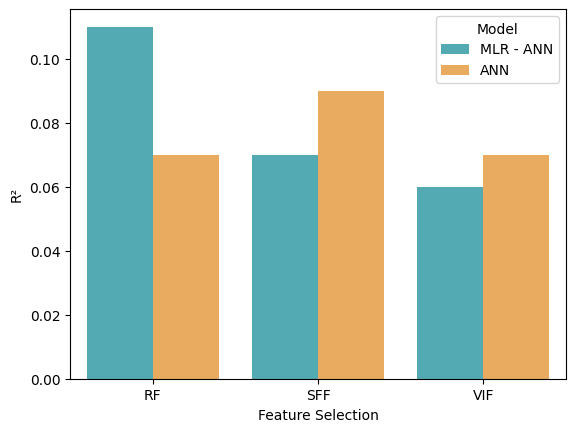

In [54]:
sns.barplot(x=metrics_df['FS Method'], y = metrics_df['R2'],hue = metrics_df['Model'],
            palette = ['#44b7c2', '#ffae49'])

plt.xlabel("Feature Selection")
plt.ylabel('R' + '\u00b2' )
plt.show()

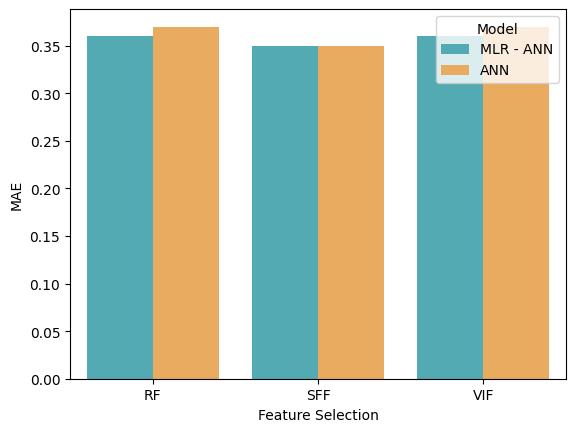

In [58]:
sns.barplot(x=metrics_df['FS Method'], y = metrics_df['MAE'],hue = metrics_df['Model'],
            palette = ['#44b7c2', '#ffae49'])

plt.xlabel("Feature Selection")
plt.ylabel('MAE')
plt.show()

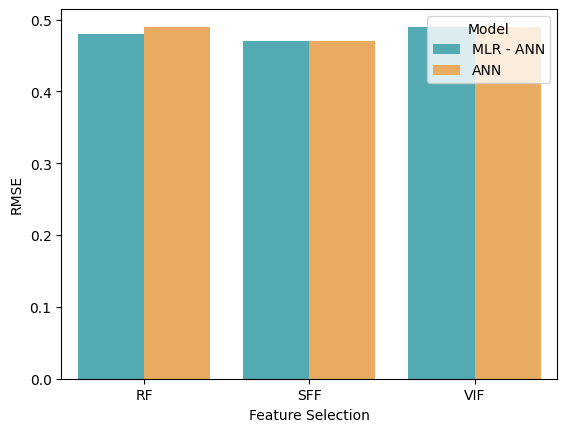

In [56]:
sns.barplot(x=metrics_df['FS Method'], y = metrics_df['RMSE'],hue = metrics_df['Model'],
            palette = ['#44b7c2', '#ffae49'])

plt.xlabel("Feature Selection")
plt.ylabel('RMSE')
plt.show()

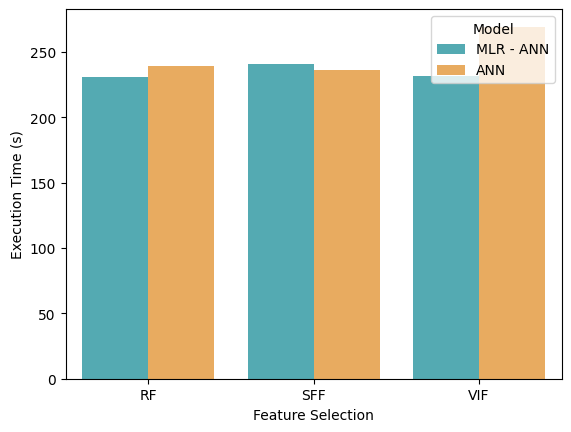

In [59]:
sns.barplot(x=metrics_df['FS Method'], y = metrics_df['Exec Time'],hue = metrics_df['Model'],
            palette = ['#44b7c2', '#ffae49'])

plt.xlabel("Feature Selection")
plt.ylabel('Execution Time (s)')
plt.show()

## Best Model (RF) 

### Hyperparameter Tuning

In [275]:
pip install scikeras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
scaler = MinMaxScaler()
features = scaler.fit_transform(rf_data_X)
target = rf_data_y

In [21]:
reg = KerasRegressor(model= ANN_Model,
                        model__initial_weights = mlr_model.coef_,
                        model__bias = mlr_model.intercept_,
                        loss = 'mean_absolute_error', 
                        optimizer='adam',
                        model__neurons =1,
                        model__activation= 'relu',
                        metrics = ['mean_absolute_error',tf.keras.metrics.RootMeanSquaredError()],
                        model__learning_rate = 0.01, 
                        verbose = False)

In [22]:
param_grid = {'model__activation':['relu','tanh'],
              'model__learning_rate':[0.1,0.01,0.001,0.0001]}

In [23]:
gs = GridSearchCV(reg, param_grid, scoring='r2', cv = 10, n_jobs=-1, verbose=True)

In [56]:
gs.fit(features,target)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=KerasRegressor(loss='mean_absolute_error', metrics=['mean_absolute_error', <keras.metrics.regression_metrics.RootMeanSquaredError object at 0x0000028490777550>], model=<function ANN_Model at 0x000002848228ED40>, model__activation='relu', model__bias=1.6774577975751908, model__initial_weights=array([-1.30060332, -0.58594462,  0.19824069, -0.18466727]), model__learning_rate=0.01, model__neurons=1, optimizer='adam', verbose=False),
             n_jobs=-1,
             param_grid={'model__activation': ['relu', 'tanh'],
                         'model__learning_rate': [0.1, 0.01, 0.001, 0.0001]},
             scoring='r2', verbose=True)

In [43]:
gs.score(features,target)

0.11674741452083426

In [ ]:
gs.best_params_

### Final Model with Train Test Split

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(rf_data_X,rf_data_y , 
                                   random_state=42,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
def ANN_Model (initial_weights,bias,neurons =1,learning_rate=0.1, input_shape=16, activation='relu'): 
    model = Sequential()
    model.add(Input(shape = X_train.shape[1])) # number of input features 
    model.add(Dense(neurons, activation = activation, name = 'hidden')) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = 'linear',name='output')) # one neuron in output layer, linear activation


    #initialize weights and bias in hidden layer
    hidden_layer = model.get_layer('hidden')
    #layer.set_weights([weights_array, bias_array])
    hidden_layer.set_weights([np.array([initial_weights]).reshape((4, 1)), np.array([bias])])


    #compile 
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model

In [12]:
mlr_model = MLR_Model(X_train,y_train)
rf_ann_model = ANN_Model(mlr_model.coef_,mlr_model.intercept_)


In [13]:
initial_weights = []
initial_bias = []

for layer in rf_ann_model.layers:
    for i in range(len(layer .get_weights()[0])):
        initial_weights.append(round(float(layer.get_weights()[0][i]),4))
    for i in range(len(layer.get_weights()[1])):
        initial_bias.append(round(float(layer.get_weights()[1][i]),4))

print(f"Initial Weights: {initial_weights}")
print(f"Initial bias: {initial_bias}")


Initial Weights: [-1.2673, -0.5256, 0.2061, -0.1683, 0.9689]
Initial bias: [1.5929, 0.0]


In [11]:
mlr_model.coef_

array([-1.26734227, -0.5256133 ,  0.2061351 , -0.16826823])

In [98]:
mlr_model.intercept_

1.592927674700734

In [14]:
rf_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
y_pred = rf_ann_model.predict(X_test) #use ann model to predict test set
print(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
print(r2_score(y_test,y_pred))#measure R-squared value
print(np.sqrt(mean_squared_error(y_test, y_pred)))

6/6 [==============================] - 0s 2ms/step
0.3597375749563824
0.2314273244401397
0.4590922368082539


In [15]:
final_weights = []
final_bias = []

for layer in rf_ann_model.layers:
    for i in range(len(layer .get_weights()[0])):
        final_weights.append(round(float(layer.get_weights()[0][i]),4))
    for i in range(len(layer.get_weights()[1])):
        final_bias.append(round(float(layer.get_weights()[1][i]),4))

print(f"Final Weights: {final_weights}")
print(f"Final bias: {final_bias}")


Final Weights: [-12.6093, -6.2665, 6.7357, -0.9793, 0.741]
Final bias: [2.543, 0.6795]


### Model Saving

In [102]:
import pickle

In [103]:
# save the model
pickle.dump(rf_ann_model, open('model.sav', 'wb'))
# save the scaler
pickle.dump(scaler, open('scaler.sav', 'wb'))

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp4vtc_204\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp4vtc_204\assets


In [105]:
# load the model
model = pickle.load(open('model.sav', 'rb'))
# load the scaler
scaler = pickle.load(open('scaler.sav', 'rb'))

In [115]:
input_data =(1701,975.3,20.88,78.36)

In [112]:
rf_data_X.head(1)

,rain (mm),surface_pressure (hPa),dewpoint_2m (°C),relativehumidity_2m (%)
0,1701.0,975.3,20.88,78.36


In [116]:
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
scaled = scaler.transform(input_data_reshaped)
prediction = model.predict(scaled)
print(f"Predicted output: {prediction}")

1/1 [==============================] - 0s 50ms/step
Predicted output: [[0.7130559]]
